<a href="https://colab.research.google.com/github/Ananya-AJ/CMPE255-Data-Mining/blob/main/CodeBooks/Sentiment_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import gzip
import json
import string
import matplotlib.pyplot as plt
import pickle
import plotly.express as px
import numpy as np
from scipy import sparse

##Read the reviews of all categories

In [ ]:
df_cellphones = pd.read_pickle('/content/drive/MyDrive/Sentiment_data/cellphone_reviews_sample_df.pkl')
df_grocery = pd.read_pickle('/content/drive/MyDrive/Sentiment_data/grocery_reviews_sample_df.pkl')
df_arts = pd.read_pickle('/content/drive/MyDrive/Sentiment_data/arts_reviews_sample_df.pkl')
df_patio = pd.read_pickle('/content/drive/MyDrive/Sentiment_data/patio_reviews_sample_df.pkl')

df_cellphones['product'] = 'Cellphones_Accessories'
df_grocery['product'] = 'Grocery_GourmetFoods'
df_arts['product'] = 'Arts_Crafts_Sewing'
df_patio['product'] = 'Patio_Lawn_Garden'

df_allproducts = pd.concat([df_cellphones, df_grocery, df_arts, df_patio], ignore_index=True)
df = df_allproducts.dropna(subset=['reviewText'])

pd.to_pickle(df, '/content/drive/MyDrive/Sentiment_data/allproducts_reviews_df.pkl')

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Sentiment_data/allproducts_reviews_df.pkl')

##Visulaization of rating counts for each category

In [ ]:
df_rating_grouped = df.groupby(['product', 'overall']).agg(Count=pd.NamedAgg(column="overall", aggfunc="count")).reset_index()

In [ ]:
px.sunburst(
        df_rating_grouped,
        path=['product', 'overall'],
        values='Count',
        width=500, 
        height=500
    )

In [ ]:
df_polarity = pd.read_pickle('/content/drive/MyDrive/Sentiment_data/all_products_review_polarity_df.pkl')
df_features = pd.read_pickle('/content/drive/MyDrive/Sentiment_data/all_products_review_features_df.pkl')
df_features_expanded = pd.read_pickle('/content/drive/MyDrive/Sentiment_data/all_products_review_features_expanded_df.pkl')

In [ ]:
sentiment_row = {'negative':[], 'neutral':[], 'positive':[], 'compound':[]}
def split_polarity(row):
  sentiment_row['negative'].append(row['neg'])
  sentiment_row['neutral'].append(row['neu'])
  sentiment_row['positive'].append(row['pos'])
  sentiment_row['compound'].append(row['compound'])

df_polarity['polarity'].apply(lambda x: split_polarity(x))

0         None
1         None
2         None
3         None
4         None
          ... 
999558    None
999559    None
999560    None
999561    None
999562    None
Name: polarity, Length: 999563, dtype: object

##Chacking if the dataset is balanced based on positive and negative reviews

In [ ]:
df_sentiment_split = pd.DataFrame.from_dict(sentiment_row)
df_sentiment_polarity = pd.concat([df_polarity, df_sentiment_split], axis=1)

In [ ]:
df_sentiment_polarity.head()

,review,lemmas,polarity,negative,neutral,positive,compound
0,DOESN'T FIT MY LG 4,fit lg 4,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",0.000,0.286,0.714,0.3612
1,Fits very nicely as long as you follow proper ...,fit nicely long follow proper instruction install,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.000,0.481,0.519,0.6597
2,It holds the phone very well enough.\nBut it's...,hold phone well enough arm pretty wobbly push ...,"{'neg': 0.094, 'neu': 0.657, 'pos': 0.249, 'co...",0.094,0.657,0.249,0.5106
3,When you have an iPhone you usually go one of ...,iphone usually go one two way choose case eith...,"{'neg': 0.063, 'neu': 0.575, 'pos': 0.362, 'co...",0.063,0.575,0.362,0.9930
4,This is my second Armorbox. I wore the first o...,second armorbox wore first one working industr...,"{'neg': 0.045, 'neu': 0.638, 'pos': 0.317, 'co...",0.045,0.638,0.317,0.8183


In [ ]:
df_polarity['sentiment'] = df_sentiment_polarity['compound'].apply(lambda x: 1 if x >=0 else 0)

In [ ]:
pd.to_pickle(df_polarity, '/content/drive/MyDrive/Sentiment_data/allproducts_labeled.pkl')

In [ ]:
print('pct of negatives: ', df_polarity['sentiment'].value_counts()[0] / df_polarity.shape[0])
print('pct of positives: ', df_polarity['sentiment'].value_counts()[1] / df_polarity.shape[0])

pct of negatives:  0.06999758894636957
pct of positives:  0.9300024110536305


In [ ]:
df.loc[:, 'sentiment'] = df_polarity['sentiment']

In [ ]:
df.loc[df['product']=='Patio_Lawn_Garden']

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,product,sentiment
750000,5.0,True,"03 20, 2014",A1K2LON2JNL3ZK,B00HEQNNFC,NaN,Jerry,These are perfect for my garden. The quality s...,Very nice item,1395273600,NaN,NaN,Patio_Lawn_Garden,1.0
750001,4.0,True,"01 9, 2018",A3SK8WUMJBBX7A,B000A0UCRG,{'Size:': ' 12 OZ'},phunnypharm,Still a work in progress,Four Stars,1515456000,NaN,NaN,Patio_Lawn_Garden,1.0
750002,5.0,True,"06 5, 2016",AQZJJBQCGEE5W,B00W6EJ9IW,{'Color:': ' N/A'},Georgia Crabb,GOOD PRICE AND SERVICE.,GOOD PRICE AND SERVICE,1465084800,NaN,NaN,Patio_Lawn_Garden,1.0
750003,5.0,False,"07 14, 2017",A1OKSKRNDRG33F,B000WEPFOK,NaN,Thatsanono,Thank you,Five Stars,1499990400,NaN,NaN,Patio_Lawn_Garden,1.0
750004,3.0,True,"01 13, 2016",A24Y883I1571TG,B00155PNQA,{'Color:': ' Verde Claw Tong'},Music Man,Handles are a little too long for gripping and...,Three Stars,1452643200,NaN,NaN,Patio_Lawn_Garden,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,5.0,True,"05 23, 2014",A1PY3XHWR5GEOC,B001PCRFYG,{'Size:': ' 1 Pack'},Lyman,This1-1/4 no spill gas can Is just what I was ...,Great product,1400803200,NaN,NaN,Patio_Lawn_Garden,NaN
999996,5.0,True,"02 20, 2011",AORZWOULTSN19,B000JLK0SM,{'Style:': ' 26-Inch Poly Scoop Ergonomic'},C. Grant,Ordered it a couple weeks ago and we are havin...,Where has this been all my life,1298160000,8,NaN,Patio_Lawn_Garden,NaN
999997,4.0,True,"06 26, 2018",A2ZD1LQFF6ECQJ,B018GRWP4M,NaN,AussiegirlIngrid,This is so adorable. I put it on my Emma's gra...,Good weight to it and very nicely made for the...,1529971200,NaN,NaN,Patio_Lawn_Garden,NaN
999998,5.0,True,"02 3, 2018",AZOQ8PJLQ5RG5,B000WEOQC2,NaN,Robert,Works as it should and fit perfectly.,Five Stars,1517616000,NaN,NaN,Patio_Lawn_Garden,NaN


##Visualization to see positive and negative reviews in each category

In [ ]:
df_sentiment_grouped = df.groupby(['product', 'sentiment']).agg(Count=pd.NamedAgg(column="sentiment", aggfunc="count")).reset_index()

In [ ]:
px.sunburst(
        df_sentiment_grouped,
        path=['product', 'sentiment'],
        values='Count',
        width=500, 
        height=500
    )

In [ ]:
df_sentiment = pd.read_pickle('/content/drive/MyDrive/Sentiment_data/allproducts_labeled.pkl')

In [ ]:
df_sentiment.head()

,review,lemmas,polarity,sentiment,expanded_lemmas
0,DOESN'T FIT MY LG 4,fit lg 4,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",1,not fit lg 4
1,Fits very nicely as long as you follow proper ...,fit nicely long follow proper instruction install,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",1,fit nicely long follow proper instruction install
2,It holds the phone very well enough.\nBut it's...,hold phone well enough arm pretty wobbly push ...,"{'neg': 0.094, 'neu': 0.657, 'pos': 0.249, 'co...",1,hold phone well enough arm pretty wobbly push ...
3,When you have an iPhone you usually go one of ...,iphone usually go one two way choose case eith...,"{'neg': 0.063, 'neu': 0.575, 'pos': 0.362, 'co...",1,iphone usually go one two way choose case eith...
4,This is my second Armorbox. I wore the first o...,second armorbox wore first one working industr...,"{'neg': 0.045, 'neu': 0.638, 'pos': 0.317, 'co...",1,second armorbox wore first one working industr...


In [ ]:
df_sentiment['expanded_lemmas'] = df_features_expanded.loc[:, 'lemmas']

In [ ]:
df_sentiment.to_pickle('/content/drive/MyDrive/Sentiment_data/allproducts_labeled.pkl')

In [ ]:
# df[['overall', 'product']]
# df_sentiment[['sentiment']]
# df_features[['review_length', 'token_count', 'stopword_count', 'punctuation_count', 'lemma_count']]

In [ ]:
df_features_for_groups = pd.concat(
    [df_sentiment[['sentiment', 'expanded_lemmas']], 
     df_features[['review_length', 'token_count', 'stopword_count', 'punctuation_count', 'lemma_count']],
     df[['overall', 'product']]
    ],
    axis=1
  )
df_features_for_groups.loc[df_features_for_groups['product']=='Patio_Lawn_Garden']

,sentiment,expanded_lemmas,review_length,token_count,stopword_count,punctuation_count,lemma_count,overall,product
750000,1.0,swapped de perlite looking organic solution ti...,81.0,93.0,40.0,10.0,43.0,5.0,Patio_Lawn_Garden
750001,1.0,well built large bore ball valve great service...,15.0,16.0,4.0,3.0,9.0,4.0,Patio_Lawn_Garden
750002,1.0,not quite expected,5.0,5.0,3.0,0.0,2.0,5.0,Patio_Lawn_Garden
750003,1.0,work expected overpriced bbq cover,9.0,12.0,4.0,3.0,5.0,5.0,Patio_Lawn_Garden
750004,1.0,great price work great,7.0,8.0,2.0,2.0,4.0,3.0,Patio_Lawn_Garden
...,...,...,...,...,...,...,...,...,...
999995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Patio_Lawn_Garden
999996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Patio_Lawn_Garden
999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Patio_Lawn_Garden
999998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Patio_Lawn_Garden


In [ ]:
df_features_for_groups.to_csv('/content/drive/MyDrive/Sentiment_data/product_dashboard_data1.csv', index=False)

In [ ]:
df_features_for_groups = pd.read_csv('/content/drive/MyDrive/Sentiment_data/product_dashboard_data1.csv')

In [ ]:
df_features_for_groups.head()

,sentiment,expanded_lemmas,review_length,token_count,stopword_count,punctuation_count,lemma_count,overall,product
0,1.0,not fit lg 4,5.0,7.0,3.0,1.0,3.0,1.0,Cellphones_Accessories
1,1.0,fit nicely long follow proper instruction install,12.0,13.0,5.0,1.0,7.0,5.0,Cellphones_Accessories
2,1.0,hold phone well enough arm pretty wobbly push ...,28.0,34.0,13.0,4.0,17.0,3.0,Cellphones_Accessories
3,1.0,iphone usually go one two way choose case eith...,241.0,302.0,143.0,39.0,120.0,5.0,Cellphones_Accessories
4,1.0,second armorbox wore first one working industr...,43.0,48.0,19.0,4.0,25.0,4.0,Cellphones_Accessories


In [ ]:
df_grouped = df_features_for_groups.groupby(
    ['product'])[['review_length', 'token_count', 'stopword_count', 'punctuation_count', 'lemma_count']]\
    .sum()\
    .unstack()\
    .reset_index()\
    .rename(columns={'level_0': 'Feature', 0: 'Sum'})
df_grouped.head()

,Feature,product,Sum
0,review_length,Arts_Crafts_Sewing,7878402.0
1,review_length,Cellphones_Accessories,12623686.0
2,review_length,Grocery_GourmetFoods,9734810.0
3,review_length,Patio_Lawn_Garden,11617042.0
4,token_count,Arts_Crafts_Sewing,9086763.0


##visualize the total number of features formed for each product category

In [ ]:
px.bar(
        df_grouped,
        x='Sum',
        y='Feature',
        color='product',
        orientation='h',
        barmode='group',
        title=f"Sum of features for each product group",
        width=500, 
        height=500,
        labels={"Sum":"Sum of features", "Feature": "Feature"}
    )

##Word cloud visualization for psotive and negative sentiments

In [ ]:
df_features_for_groups = pd.read_csv('/content/drive/MyDrive/Sentiment_data/product_dashboard_data1.csv')

In [ ]:
def tokenize(document):
    tokens = [w for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens



##using tf-idf for vectorisation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2,2)),max_features=50, strip_accents = 'unicode')

In [ ]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english')) - set(['not', 'get', 'make','one'])
stop


In [ ]:
df_features_for_groups.expanded_lemmas = df_features_for_groups.expanded_lemmas.astype(str)

In [ ]:
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII', 'ignore').decode('ASCII')
    return word

In [ ]:
def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

In [ ]:
df_features_for_groups['expanded_lemmas'] = df_features_for_groups['expanded_lemmas'].apply(remove_encoding_text)

In [ ]:
text = ' '.join(words for words in df_features_for_groups['expanded_lemmas'])
len(text)

139218536

In [ ]:
reviews = np.array(df_features_for_groups['expanded_lemmas'])

In [ ]:
vectors = vectorizer.fit_transform(reviews)

In [ ]:
vectors.shape

(1000000, 50)

In [ ]:
vectorizer.vocabulary_.items()

dict_items([('thought would', 42), ('fast shipping', 6), ('screen protector', 38), ('pretty good', 34), ('good product', 11), ('first time', 8), ('great case', 13), ('great price', 14), ('great product', 15), ('would recommend', 49), ('easy install', 4), ('phone case', 33), ('feel like', 7), ('well made', 43), ('case phone', 0), ('worked great', 47), ('highly recommend', 19), ('make sure', 30), ('work great', 45), ('good quality', 12), ('work well', 46), ('look like', 28), ('high quality', 18), ('love case', 29), ('look great', 27), ('much better', 31), ('long time', 25), ('really good', 36), ('really like', 37), ('even though', 5), ('great quality', 16), ('last long', 21), ('customer service', 2), ('data hook', 3), ('hook product', 20), ('product link', 35), ('link linked', 22), ('linked class', 24), ('class link', 1), ('link normal', 23), ('normal href', 32), ('would like', 48), ('look good', 26), ('work fine', 44), ('good price', 10), ('heavy duty', 17), ('taste great', 40), ('taste

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tfidf_weights = [(word, vectors.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [ ]:
from wordcloud import WordCloud
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=50).fit_words(dict(tfidf_weights))

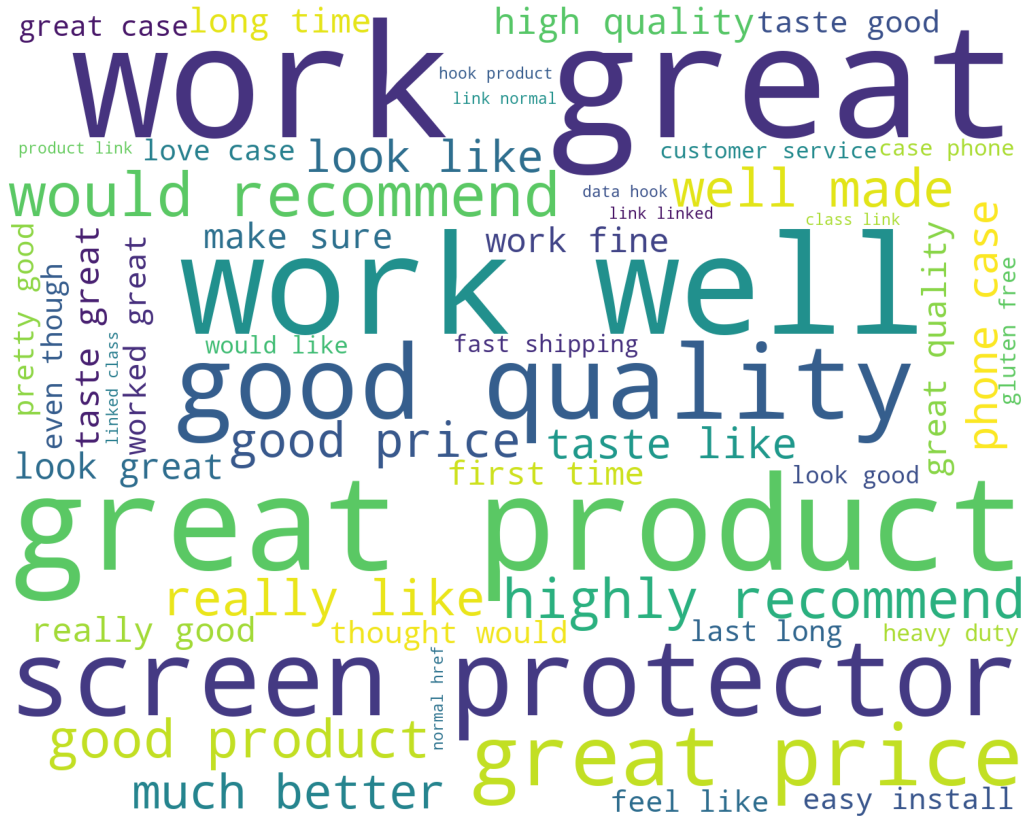

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('/content/drive/MyDrive/Sentiment_data/wordcloud.png')